**Data Preprocessing**

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import pickle
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
# Read Penguins Dataset and print its shape
penguins = pd.read_csv("penguins.csv")
penguins.shape

(344, 10)

In [3]:
# Info of the Dataset
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   species                 333 non-null    object 
 1   island                  334 non-null    object 
 2   calorie requirement     344 non-null    int64  
 3   average sleep duration  344 non-null    int64  
 4   bill_length_mm          337 non-null    float64
 5   bill_depth_mm           333 non-null    float64
 6   flipper_length_mm       336 non-null    float64
 7   body_mass_g             339 non-null    float64
 8   gender                  327 non-null    object 
 9   year                    342 non-null    float64
dtypes: float64(5), int64(2), object(3)
memory usage: 27.0+ KB


In [4]:
# Main Statistics of the Dataset
penguins.describe()

,calorie requirement,average sleep duration,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,344.000000,344.000000,337.000000,333.000000,336.000000,339.000000,342.000000
mean,5270.002907,10.447674,45.494214,18.018318,197.764881,4175.463127,2008.035088
std,1067.959116,2.265895,10.815787,9.241384,27.764491,858.713267,0.816938
min,3504.000000,7.000000,32.100000,13.100000,10.000000,882.000000,2007.000000
25%,4403.000000,9.000000,39.500000,15.700000,190.000000,3550.000000,2007.000000
50%,5106.500000,10.000000,45.100000,17.300000,197.000000,4050.000000,2008.000000
75%,6212.750000,12.000000,49.000000,18.700000,213.000000,4750.000000,2009.000000
max,7197.000000,14.000000,124.300000,127.260000,231.000000,6300.000000,2009.000000


In [5]:
# Printing the top 25 rows
penguins.head(25)

,species,island,calorie requirement,average sleep duration,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,gender,year
0,Adelie,Torgersen,6563,11,39.10,18.7,181.0,3750.0,male,2007.0
1,Adelie,Torgersen,4890,14,39.50,17.4,186.0,3800.0,female,2007.0
2,Adelie,Torgersen,7184,11,40.30,18.0,195.0,3250.0,female,2007.0
3,Adelie,Torgersen,4169,8,NaN,NaN,NaN,992.0,NaN,2007.0
4,Adelie,Torgersen,4774,8,36.70,19.3,193.0,3450.0,female,2007.0
5,Adelie,Torgersen,4403,13,39.30,20.6,190.0,3650.0,male,2007.0
6,Adelie,Torgersen,5071,11,38.90,17.8,181.0,3625.0,female,2007.0
7,Adelie,Torgersen,6799,9,39.20,19.6,195.0,4675.0,male,2007.0
8,Adelie,Torgersen,5593,8,34.10,18.1,193.0,3475.0,NaN,2007.0
9,Adelie,Torgersen,6275,7,42.00,20.2,190.0,4250.0,NaN,2007.0


In [6]:
# Standerdize Categorical Feature value
categorical_features = penguins.select_dtypes(include = ['object']).columns.tolist()

def standerdizer(column_name):
    penguins[column_name] = penguins[column_name].str.capitalize()
    print("After Standerdizing: {0}".format(penguins[column_name].unique()))

for feature in categorical_features:
    print("Before Standerdizing: {0}".format(penguins[feature].unique()))
    standerdizer(feature)

Before Standerdizing: ['Adelie' 'adelie' nan 'Gentoo' 'gentoo' 'GENTOO' 'Chinstrap' 'CHINSTRAP'
 'chinstrap']
After Standerdizing: ['Adelie' nan 'Gentoo' 'Chinstrap']
Before Standerdizing: ['Torgersen' 'Biscoe' nan 'Dream' 'torgersen' 'biscoe' 'BISCOE' 'dream'
 'DREAM']
After Standerdizing: ['Torgersen' 'Biscoe' nan 'Dream']
Before Standerdizing: ['male' 'female' nan 'FEMALE' 'MALE']
After Standerdizing: ['Male' 'Female' nan]


In [7]:
# Printing the number of null values in each column
print("Number of null values in each feature:")
penguins.isna().sum()

Number of null values in each feature:


species                   11
island                    10
calorie requirement        0
average sleep duration     0
bill_length_mm             7
bill_depth_mm             11
flipper_length_mm          8
body_mass_g                5
gender                    17
year                       2
dtype: int64

In [8]:
# Replacing Categorical Data containing null vlaues with most repeated values as we have limited data

def nan_to_mode(column_name):
    penguins[column_name].fillna(penguins[column_name].mode()[0], inplace = True)

for feature in categorical_features:
    if(penguins[feature].isnull().any()):
        print("There are Null values in feature: {0}. Hence replacing it with most repeated value".format(feature))
        nan_to_mode(feature)
    else:
        print("There are no Null values in feature: {0}".format(feature))

There are Null values in feature: species. Hence replacing it with most repeated value
There are Null values in feature: island. Hence replacing it with most repeated value
There are Null values in feature: gender. Hence replacing it with most repeated value


In [9]:
# Printing the number of null values in each column after cleaning categorical columns
print("Number of null values in each feature:")
penguins.isna().sum()

Number of null values in each feature:


species                    0
island                     0
calorie requirement        0
average sleep duration     0
bill_length_mm             7
bill_depth_mm             11
flipper_length_mm          8
body_mass_g                5
gender                     0
year                       2
dtype: int64

In [10]:
# Get the number of outliers for all non-categorical data and store features in a list

non_categorical_features = penguins.drop(columns=categorical_features)
non_categorical_features.drop(columns=['year'],inplace=True)
outlier_features = []

def get_outliers(column):
    # Calculating the IQR (Interquartile Range)
    top_25 = column.quantile(0.25)
    top_75 = column.quantile(0.75)
    IQR = top_75 - top_25
    # Define a lower and upper bound for outliers
    lower_bound = top_25 - 1.5 * IQR
    upper_bound = top_75 + 1.5 * IQR
    outliers = column[(column<lower_bound) | (column>upper_bound)]
    return outliers
print("Outliers in each feature Before cleaning:")
for column in non_categorical_features.columns:
    outliers = get_outliers(penguins[column])
    print(column,len(outliers))
    if (len(outliers) > 0):
        outlier_features.append(column)

Outliers in each feature Before cleaning:
calorie requirement 0
average sleep duration 0
bill_length_mm 9
bill_depth_mm 3
flipper_length_mm 6
body_mass_g 3


In [11]:
# Replacing the outliers using IQR technique

def remove_outliers(column_name):
    top_25 = penguins[column_name].quantile(0.25)
    top_75 = penguins[column_name].quantile(0.75)
    iqr = top_75 - top_25
    lower_bound = top_25 - 1.5 * iqr
    upper_bound = top_75 + 1.5 * iqr
    outliers = (penguins[column_name] < lower_bound) | (penguins[column_name] > upper_bound)
    penguins.loc[outliers,column_name] = penguins[column_name].median().astype(penguins[column_name].dtype)

print("Outliers in each feature Afer cleaning:")
for feature in outlier_features:
    remove_outliers(feature)
    outliers = get_outliers(penguins[feature])
    print(feature, len(outliers))

Outliers in each feature Afer cleaning:
bill_length_mm 0
bill_depth_mm 0
flipper_length_mm 0
body_mass_g 0


In [12]:
# Printing the number of null values After removing outliers
print("Number of null values in each feature:")
penguins.isna().sum()

Number of null values in each feature:


species                    0
island                     0
calorie requirement        0
average sleep duration     0
bill_length_mm             7
bill_depth_mm             11
flipper_length_mm          8
body_mass_g                5
gender                     0
year                       2
dtype: int64

In [13]:
# Replacing Non-Categorical Data containing null vlaues with mean values
def nan_to_mean(column_name):
    penguins[column_name].fillna(penguins[column_name].mean(), inplace = True)
    
for feature in penguins:
    if(penguins[feature].isna().sum() > 0):
        nan_to_mean(feature)

# Printing the number of null values in each column after cleaning non-categorical columns
print("Number of null values in each feature:")
penguins.isna().sum()

Number of null values in each feature:


species                   0
island                    0
calorie requirement       0
average sleep duration    0
bill_length_mm            0
bill_depth_mm             0
flipper_length_mm         0
body_mass_g               0
gender                    0
year                      0
dtype: int64

**Data Visualization**

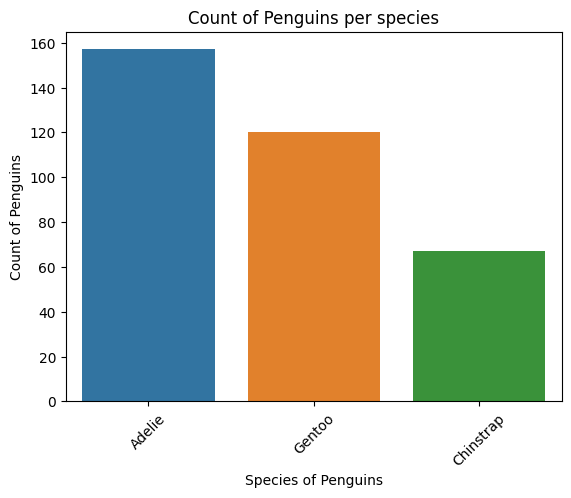

In [14]:
# Count of Penguins per species
sns.countplot(data=penguins, x='species')
plt.xlabel("Species of Penguins")
plt.ylabel("Count of Penguins")
plt.title('Count of Penguins per species')
plt.xticks(rotation=45)
plt.show()

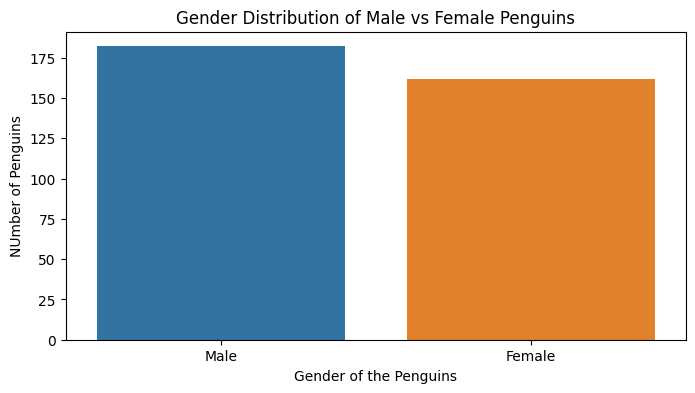

In [15]:
# Gender Distribution of Penguins

plt.figure(figsize=(8, 4))
sns.countplot(data=penguins, x='gender')
plt.title('Gender Distribution of Male vs Female Penguins')
plt.xlabel('Gender of the Penguins')
plt.ylabel('NUmber of Penguins')
plt.show()

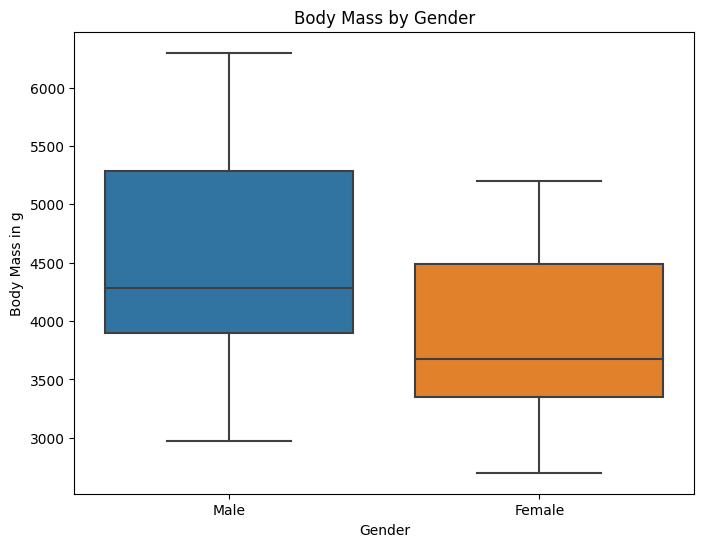

In [16]:
# Body mass distribution of both the genders.

plt.figure(figsize=(8, 6))
sns.boxplot(data=penguins, x='gender', y='body_mass_g')
plt.title('Body Mass by Gender')
plt.xlabel('Gender')
plt.ylabel('Body Mass in g')
plt.show()

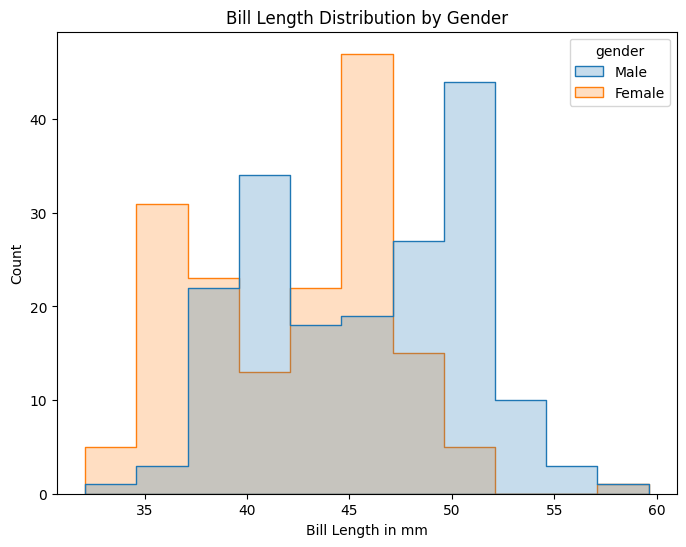

In [17]:
# Bill_length distribution of both the genders

plt.figure(figsize=(8, 6))
sns.histplot(data=penguins, x='bill_length_mm', hue='gender', element='step', common_norm=False)
plt.title('Bill Length Distribution by Gender')
plt.xlabel('Bill Length in mm')
plt.show()

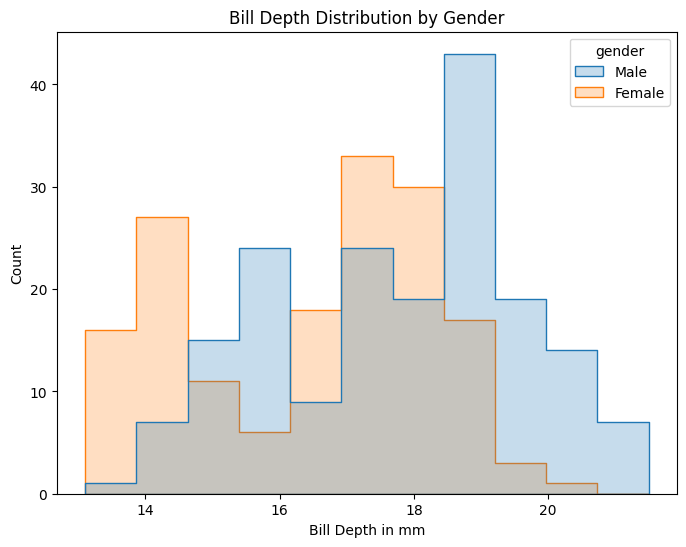

In [18]:
# Bill_Depth distribution of both the genders

plt.figure(figsize=(8, 6))
sns.histplot(data=penguins, x='bill_depth_mm', hue='gender', element='step', common_norm=False)
plt.title('Bill Depth Distribution by Gender')
plt.xlabel('Bill Depth in mm')
plt.show()

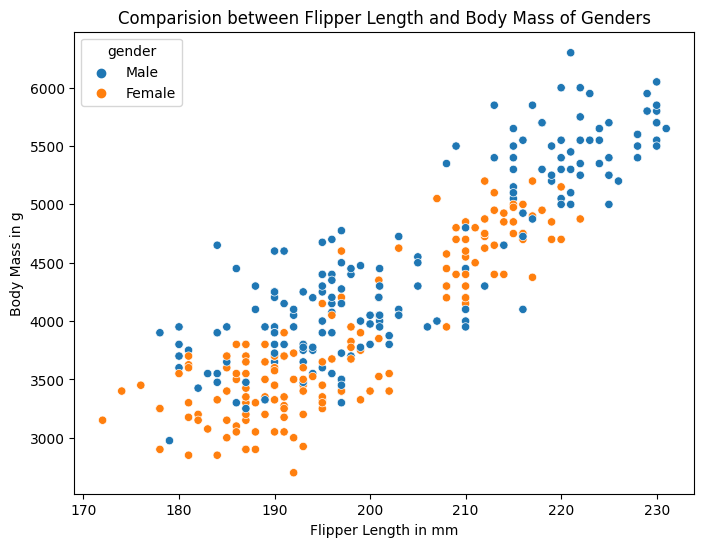

In [19]:
# Comparision between Flipper Length and Body Mass of Genders

plt.figure(figsize=(8, 6))
sns.scatterplot(data=penguins, x='flipper_length_mm', y='body_mass_g', hue='gender')
plt.title('Comparision between Flipper Length and Body Mass of Genders')
plt.xlabel('Flipper Length in mm')
plt.ylabel('Body Mass in g')
plt.show()

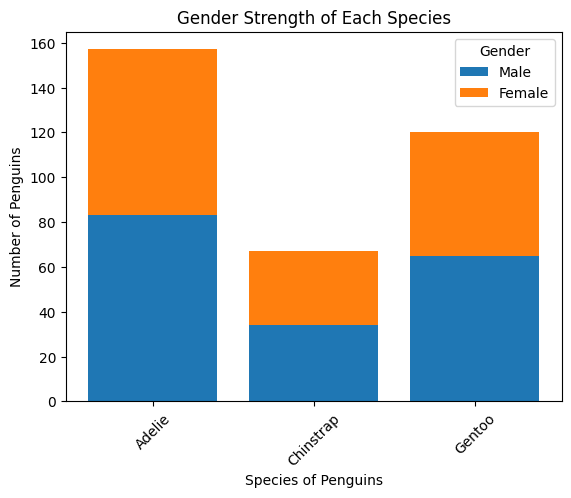

In [20]:
# Gender Strength of Each Species

# Group the penguins by species and gender
gender_and_species = penguins.groupby(['species', 'gender']).size().unstack()

# Initialize the gender strengths to empty list
male_strength = []
female_strength = []

# Append gender strenghts to respective lists
for gender in gender_and_species.values:
    male_strength.append(gender[1])
    female_strength.append(gender[0])

plt.bar(gender_and_species.index, male_strength, label='Male')
plt.bar(gender_and_species.index, female_strength, bottom=male_strength, label='Female')
plt.xlabel('Species of Penguins')
plt.ylabel('Number of Penguins')
plt.title('Gender Strength of Each Species')
plt.xticks(rotation=45)
plt.legend(title='Gender', loc='upper right')
plt.show()

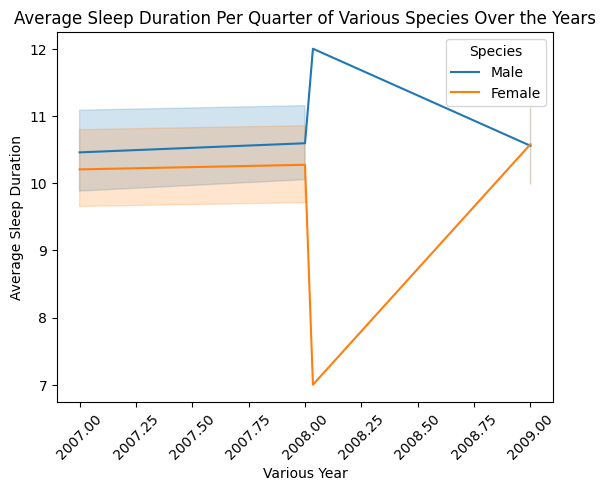

In [21]:
# Average Sleep Duration Per Quarter of Various Species Over the Years

sns.lineplot(data=penguins, x='year', y='average sleep duration', hue='gender')
plt.title('Average Sleep Duration Per Quarter of Various Species Over the Years')
plt.xlabel('Various Year')
plt.ylabel('Average Sleep Duration')
plt.xticks(rotation=45)
plt.legend(title='Species', loc='upper right')
plt.show()

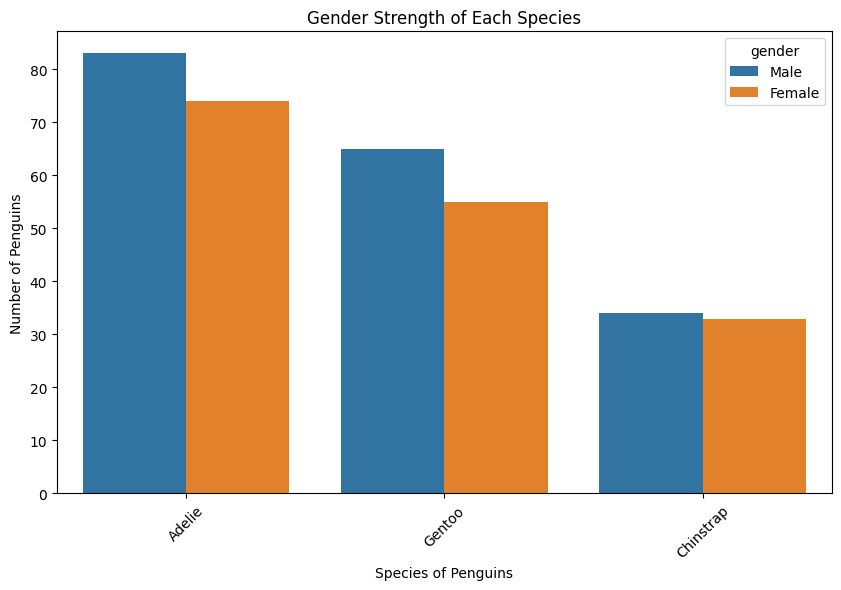

In [22]:
# Gender Strength of Each Species

plt.figure(figsize=(10, 6))
sns.countplot(data=penguins, x='species', hue='gender')
plt.xlabel('Species of Penguins')
plt.ylabel('Number of Penguins')
plt.title('Gender Strength of Each Species')
plt.xticks(rotation=45)
plt.show()

In [23]:
# String to Categorical Conversion

def cat_encoding(column_name):
    penguins[column_name] = penguins[column_name].astype('category').cat.codes

for feature in categorical_features:
    cat_encoding(feature)

penguins.head()

,species,island,calorie requirement,average sleep duration,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,gender,year
0,0,2,6563,11,39.100000,18.700000,181.000000,3750.0,1,2007.0
1,0,2,4890,14,39.500000,17.400000,186.000000,3800.0,0,2007.0
2,0,2,7184,11,40.300000,18.000000,195.000000,3250.0,0,2007.0
3,0,2,4169,8,44.048368,17.172072,200.916667,4050.0,1,2007.0
4,0,2,4774,8,36.700000,19.300000,193.000000,3450.0,0,2007.0


In [24]:
# Normalizing non-categorical features:

def normalization(column_name):
    min = penguins[column_name].min()
    max = penguins[column_name].max()
    penguins[column_name] = (penguins[column_name] - min) / (max - min)

for feature in non_categorical_features.columns:
    normalization(feature)

penguins.head()

,species,island,calorie requirement,average sleep duration,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,gender,year
0,0,2,0.828324,0.571429,0.254545,0.666667,0.152542,0.291667,1,2007.0
1,0,2,0.375305,1.000000,0.269091,0.511905,0.237288,0.305556,0,2007.0
2,0,2,0.996480,0.571429,0.298182,0.583333,0.389831,0.152778,0,2007.0
3,0,2,0.180070,0.142857,0.434486,0.484770,0.490113,0.375000,1,2007.0
4,0,2,0.343894,0.142857,0.167273,0.738095,0.355932,0.208333,0,2007.0


<Figure size 2000x1500 with 0 Axes>

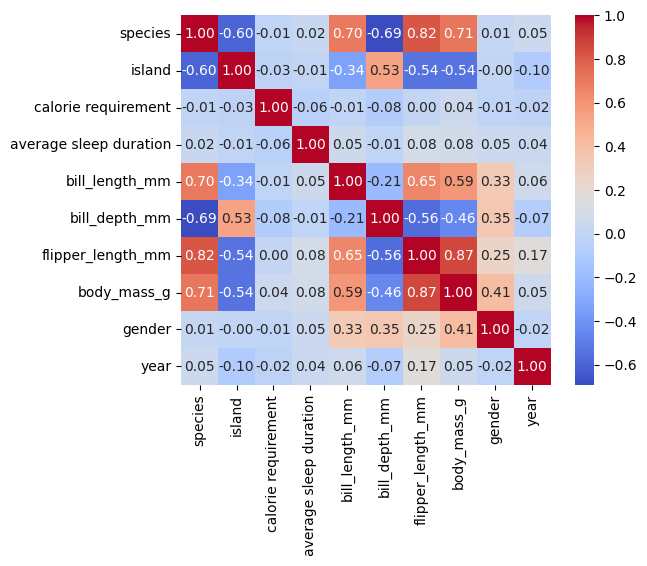

<Figure size 2000x1500 with 0 Axes>

In [25]:
# Correlation Matrix

calorie_requirement_correlation = penguins.corr()
sns.heatmap(calorie_requirement_correlation, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.figure(figsize=(20, 15))

In [26]:
# Saving the preprocessed data

penguins.to_csv("penguins_preprocessed.csv", index=False)